# Flight Data Exploration
## by Anthony Andersland

## Preliminary Wrangling

This exploration will be on a dataset of flights from the US in 2005.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# import files to data frames
df_2005 = pd.read_csv('input/2005.csv')

In [3]:
# high level overview
print(df_2005.shape)
print(df_2005.info())
print(df_2005.head(5))

(7140596, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7140596 entries, 0 to 7140595
Data columns (total 29 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       int64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               int64
TaxiOut              int64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         int64
WeatherDelay         int64
NASDelay             int64
SecurityDelay        int64
LateAircraftDelay    int64
dtypes: float64(6), int64(18), object(5)
memory usage: 1.5+ GB
None
   Ye

In [4]:
# descriptive stats
print(df_2005.describe())

            Year         Month    DayofMonth     DayOfWeek       DepTime  \
count  7140596.0  7.140596e+06  7.140596e+06  7.140596e+06  7.006866e+06   
mean      2005.0  6.481160e+00  1.571931e+01  3.944549e+00  1.344534e+03   
std          0.0  3.410521e+00  8.785960e+00  1.989965e+00  4.767736e+02   
min       2005.0  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
25%       2005.0  4.000000e+00  8.000000e+00  2.000000e+00  9.330000e+02   
50%       2005.0  6.000000e+00  1.600000e+01  4.000000e+00  1.331000e+03   
75%       2005.0  9.000000e+00  2.300000e+01  6.000000e+00  1.735000e+03   
max       2005.0  1.200000e+01  3.100000e+01  7.000000e+00  2.805000e+03   

         CRSDepTime       ArrTime    CRSArrTime     FlightNum  \
count  7.140596e+06  6.992838e+06  7.140596e+06  7.140596e+06   
mean   1.337973e+03  1.491418e+03  1.499840e+03  2.042659e+03   
std    4.642816e+02  5.001774e+02  4.804065e+02  1.841605e+03   
min    0.000000e+00  1.000000e+00  0.000000e+00  1.0000

In [5]:
# drop rows with missing values for variables we will use
df_2005.dropna(subset=['Month','DayofMonth','DayOfWeek','DepDelay','ArrDelay','Cancelled'], inplace=True)

### What is the structure of your dataset?

There are 7,140,596 flights in this dataset. They consist of departure and arrival times from airports in the United States for 2005.

### What is/are the main feature(s) of interest in your dataset?

I am interested in finding out what time of the year has more impacted flights. During those times, what are the causes for the impacts.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that hurricane season, holidays, and winter months all play a part in flight delays. To view this I will be using the date/time fields along with the flight counts.

## Univariate Exploration

I will start by looking at the breakdown of flights by month.

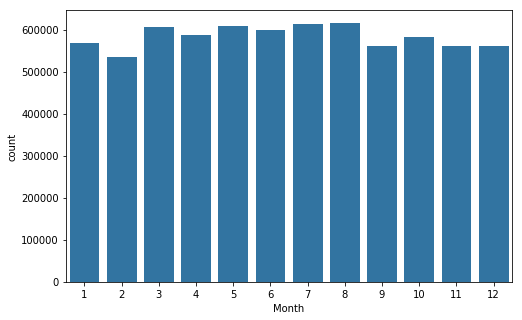

In [6]:
base_color = sb.color_palette()[0]          
fig, ax = plt.subplots(figsize=(8,5))
sb.countplot(data=df_2005, x='Month',  color = base_color);

Looking at the chart August, July, and March are the top months for flight travel. The flights look fairley distributed across the months. Interestingly, August and July are the top months rather than the holiday season of November and December. Let's look at the days of the month.

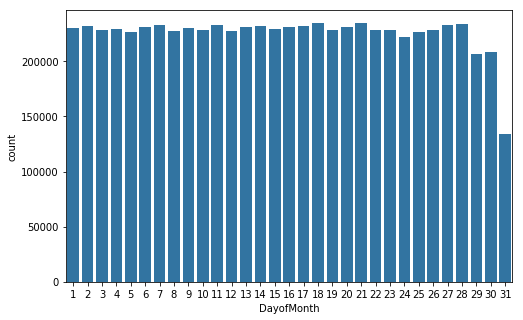

In [7]:
base_color = sb.color_palette()[0]          
fig, ax = plt.subplots(figsize=(8,5))
sb.countplot(data=df_2005, x='DayofMonth',  color = base_color);

There is a visible drop in travel for the 29th, 30th, and 31st of the month. Otherwise it is pretty similiar. Let's create some category columns from the delay variables that has minute values.

In [8]:
# function to convert columns with minutes as values to categories
def set_category_value(x):
    val = ''
    if x < 0:
        val = 'Early'
    elif x == 0:
        val = 'On-time'
    elif x > 0:
        val = 'Late'
    return val

# function to combine delay reasons into a single delay category
def combine_category_value(carr, weat, nasd, secu, late):
    val = 0
    if carr > 1 or weat > 1 or nasd > 1 or secu > 1 or late > 1:
        val = 1
    return val

In [9]:
# used to prevent running a second time
run = True
if run is True:
    # create categorical values for delayed time
    df_2005['DepDelayCat'] = df_2005.apply(lambda x: set_category_value(x['DepDelay']), axis=1)
    df_2005['ArrDelayCat'] = df_2005.apply(lambda x: set_category_value(x['ArrDelay']), axis=1)
    
    # creating categorical values for the cause of delay variables
    df_2005['CarrierDelayCat'] = df_2005.apply(lambda x: 0 if x['CarrierDelay'] == 0 else 1, axis=1)
    df_2005['WeatherDelayCat'] = df_2005.apply(lambda x: 0 if x['WeatherDelay'] == 0 else 1, axis=1)
    df_2005['NASDelayCat'] = df_2005.apply(lambda x: 0 if x['NASDelay'] == 0 else 1, axis=1)
    df_2005['SecurityDelayCat'] = df_2005.apply(lambda x: 0 if x['SecurityDelay'] == 0 else 1, axis=1)
    df_2005['LateAircraftDelayCat'] = df_2005.apply(lambda x: 0 if x['LateAircraftDelay'] == 0 else 1, axis=1)
    df_2005['OverallDelayCat'] = df_2005.apply(lambda x: combine_category_value(x['CarrierDelay'], x['WeatherDelay'], x['NASDelay'], x['SecurityDelay'], x['LateAircraftDelay']), axis=1)

    
    # change fields data types to category
    df_2005['CarrierDelayCat'] = df_2005['CarrierDelayCat'].astype('category')
    df_2005['WeatherDelayCat'] = df_2005['WeatherDelayCat'].astype('category')
    df_2005['DepDelayCat'] = df_2005['DepDelayCat'].astype('category')
    df_2005['ArrDelayCat'] = df_2005['ArrDelayCat'].astype('category')
    df_2005['NASDelayCat'] = df_2005['NASDelayCat'].astype('category')
    df_2005['SecurityDelayCat'] = df_2005['SecurityDelayCat'].astype('category')
    df_2005['LateAircraftDelayCat'] = df_2005['LateAircraftDelayCat'].astype('category')
    
    # convert columns from float to int
    df_2005['DepDelay'] = df_2005['DepDelay'].astype('int')
    df_2005['ArrDelay'] = df_2005['ArrDelay'].astype('int')
    df_2005.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6992838 entries, 0 to 7140595
Data columns (total 37 columns):
Year                    int64
Month                   int64
DayofMonth              int64
DayOfWeek               int64
DepTime                 float64
CRSDepTime              int64
ArrTime                 float64
CRSArrTime              int64
UniqueCarrier           object
FlightNum               int64
TailNum                 object
ActualElapsedTime       float64
CRSElapsedTime          int64
AirTime                 float64
ArrDelay                int32
DepDelay                int32
Origin                  object
Dest                    object
Distance                int64
TaxiIn                  int64
TaxiOut                 int64
Cancelled               int64
CancellationCode        object
Diverted                int64
CarrierDelay            int64
WeatherDelay            int64
NASDelay                int64
SecurityDelay           int64
LateAircraftDelay       int64
DepD

In [10]:
# check that the delay reasons were combined correctly
print(df_2005.query('OverallDelayCat == 0 & CarrierDelayCat == 1')['CarrierDelayCat'].count())
print(df_2005.query('OverallDelayCat == 0 & WeatherDelayCat == 1')['WeatherDelayCat'].count())
print(df_2005.query('OverallDelayCat == 0 & NASDelayCat == 1')['NASDelayCat'].count())
print(df_2005.query('OverallDelayCat == 0 & SecurityDelayCat == 1')['SecurityDelayCat'].count())
print(df_2005.query('OverallDelayCat == 0 & LateAircraftDelayCat == 1')['LateAircraftDelayCat'].count())

0
0
0
0
0


In [11]:
# write out cleaned dataset and clear out for performance reasons
df_2005.to_csv('input_cleaned/2005_cleaned.csv', sep=',')
df_2005 = None

In [12]:
# read in data to be used as a midway point. 
df_2005_c = pd.read_csv('input_cleaned/2005_cleaned.csv')
df_2005_c['CarrierDelayCat'] = df_2005_c['CarrierDelayCat'].astype('category')
df_2005_c['WeatherDelayCat'] = df_2005_c['WeatherDelayCat'].astype('category')
df_2005_c['DepDelayCat'] = df_2005_c['DepDelayCat'].astype('category')
df_2005_c['ArrDelayCat'] = df_2005_c['ArrDelayCat'].astype('category')
df_2005_c['NASDelayCat'] = df_2005_c['NASDelayCat'].astype('category')
df_2005_c['SecurityDelayCat'] = df_2005_c['SecurityDelayCat'].astype('category')
df_2005_c['LateAircraftDelayCat'] = df_2005_c['LateAircraftDelayCat'].astype('category')

df_2005_c['DepDelay'] = df_2005_c['DepDelay'].astype('int')
df_2005_c['ArrDelay'] = df_2005_c['ArrDelay'].astype('int')
df_2005_c.info();

C:\Users\Anthony\Anaconda3\envs\dand\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6992838 entries, 0 to 6992837
Data columns (total 38 columns):
Unnamed: 0              int64
Year                    int64
Month                   int64
DayofMonth              int64
DayOfWeek               int64
DepTime                 float64
CRSDepTime              int64
ArrTime                 float64
CRSArrTime              int64
UniqueCarrier           object
FlightNum               int64
TailNum                 object
ActualElapsedTime       float64
CRSElapsedTime          int64
AirTime                 float64
ArrDelay                int32
DepDelay                int32
Origin                  object
Dest                    object
Distance                int64
TaxiIn                  int64
TaxiOut                 int64
Cancelled               int64
CancellationCode        object
Diverted                int64
CarrierDelay            int64
WeatherDelay            int64
NASDelay                int64
SecurityDelay           int64
Late

Now that we have the dataset cleaned up, let's plot the delay reasons. 

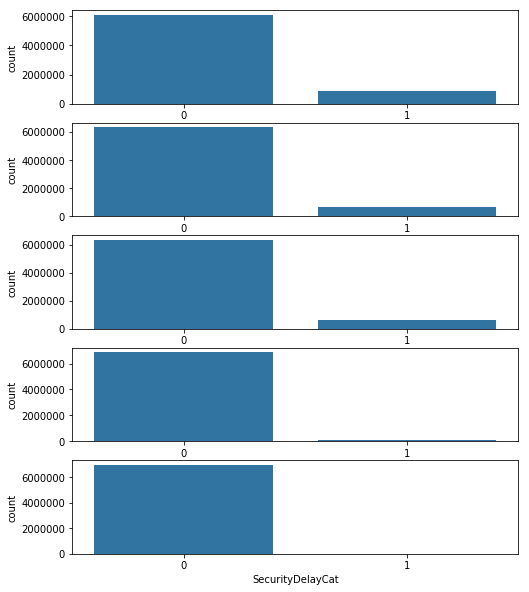

In [13]:
# plot the delay reasons
plt.figure(figsize = [8,10])

plt.subplot(5, 1, 1)
base_color = sb.color_palette()[0]          
sb.countplot(data=df_2005_c, x='NASDelayCat',  color = base_color)

plt.subplot(5, 1, 2)
base_color = sb.color_palette()[0]          
sb.countplot(data=df_2005_c, x='CarrierDelayCat',  color = base_color);

plt.subplot(5, 1, 3)
base_color = sb.color_palette()[0]          
sb.countplot(data=df_2005_c, x='LateAircraftDelayCat',  color = base_color);

plt.subplot(5, 1, 4)
base_color = sb.color_palette()[0]          
sb.countplot(data=df_2005_c, x='WeatherDelayCat',  color = base_color);

plt.subplot(5, 1, 5)
base_color = sb.color_palette()[0]          
sb.countplot(data=df_2005_c, x='SecurityDelayCat',  color = base_color);

According to the data set weather delays are low on the reasons for delays. NAS delay's or National Airspace System (NAS) are delays after the plane has left the gate. These are the most frequent delays. Let's look at how often flights are on time or delayed next.

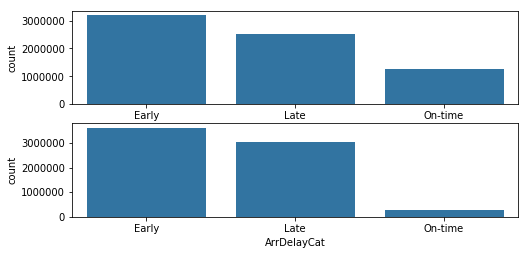

In [14]:
# plot the delay reasons
plt.figure(figsize = [8,10])

plt.subplot(5, 1, 1)
base_color = sb.color_palette()[0]          
# fig, ax = plt.subplots(figsize=(8,5))
sb.countplot(data=df_2005_c, x='DepDelayCat',  color = base_color)

plt.subplot(5, 1, 2)
base_color = sb.color_palette()[0]          
# fig, ax = plt.subplots(figsize=(5,5))
sb.countplot(data=df_2005_c, x='ArrDelayCat',  color = base_color);

We can see that there are alot of late departures from the origination. There are a very small number of flights that arrive on time.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Weather played a smaller part in delays than expected. NAS and carrier delays are the most frequent. Half of all flights are delayed.

February had the fewest flights of the year. The following specific days of any month had the fewest flights 31st, 30th, and 29th for the year. Saturday has the fewest flights of the week.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I created several new category columns from the delay fields to model later. These were created since I am interested in types of delays and not necessarily how much delay. Two delay variables were converted from float to int as the data did not have decimals and would affect any summarized counts that are displayed..

## Bivariate Exploration

Let's look at some delays by month.

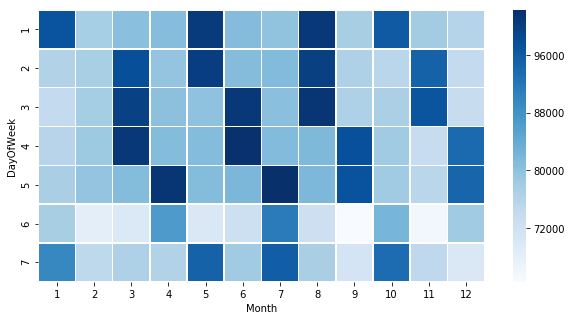

In [15]:
# start with a heat map
plt.figure(figsize = [10,5])

counts = df_2005_c.groupby(['Month', 'DayOfWeek']).size()
counts = counts.reset_index(name = 'count')
counts = counts.pivot(index = 'DayOfWeek', columns = 'Month', values = 'count')

sb.heatmap(counts, linewidths=.5, cmap='Blues');

We can see that there are definate patterns to travel throughout the year. Each month has high travel days except February. The summer months look to have the most reported delays along with March. Let's look at the arrival and departure delays throughout the year.

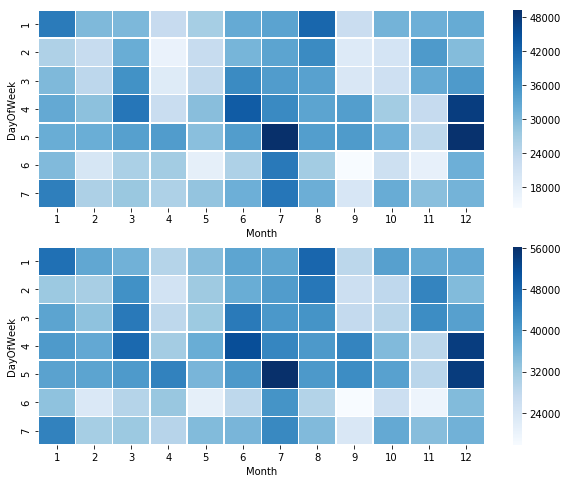

In [16]:
# plot the Departure and Arrival delays for the year
plt.figure(figsize = [10,8])

plt.subplot(2, 1, 1)
depcounts = df_2005_c.query('DepDelay > 0').groupby(['Month', 'DayOfWeek']).size()
depcounts = depcounts.reset_index(name = 'count')
depcounts = depcounts.pivot(index = 'DayOfWeek', columns = 'Month', values = 'count')
sb.heatmap(depcounts, linewidths=.5, cmap='Blues');

plt.subplot(2, 1, 2)
arrcounts = df_2005_c.query('ArrDelay > 0').groupby(['Month', 'DayOfWeek']).size()
arrcounts = arrcounts.reset_index(name = 'count')
arrcounts = arrcounts.pivot(index = 'DayOfWeek', columns = 'Month', values = 'count')
sb.heatmap(arrcounts, linewidths=.5, cmap='Blues');

On first glance these appear to be very similiar, however the scale of both graphs are not the same. Departures have more delays than arrivals. We should look at the amount of delays for the year next.

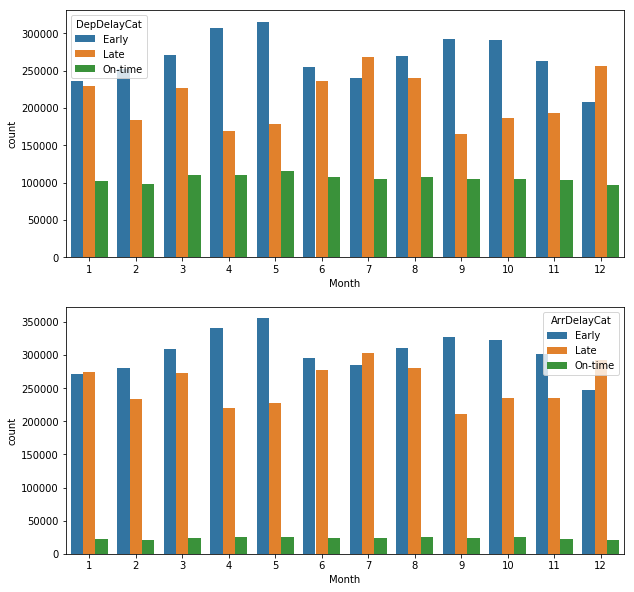

In [17]:
# investigating delays by year
plt.figure(figsize = [10,10])

plt.subplot(2, 1, 1)
sb.countplot(data=df_2005_c, x='Month', hue='DepDelayCat')

plt.subplot(2, 1, 2)
sb.countplot(data=df_2005_c, x='Month', hue='ArrDelayCat');

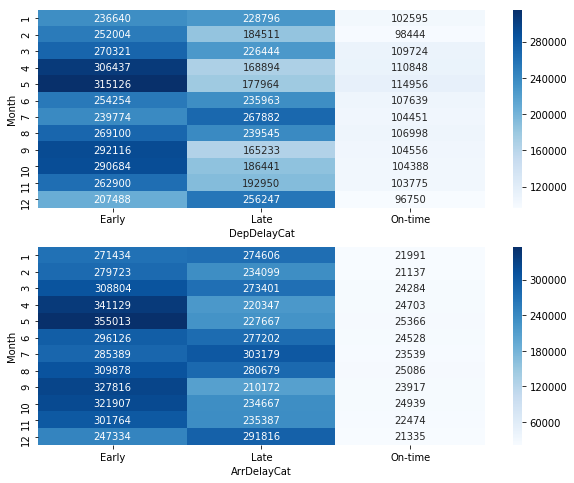

In [18]:
# heatmap version of the barchart above
plt.figure(figsize = [10,8])

plt.subplot(2, 1, 1)
dep_counts = df_2005_c.groupby(['Month','DepDelayCat']).size()
dep_counts = dep_counts.reset_index(name = 'count')
dep_counts = dep_counts.pivot(index = 'Month', columns = 'DepDelayCat', values = 'count')
sb.heatmap(dep_counts, annot=True, fmt='d', cmap='Blues')

plt.subplot(2, 1, 2)
arr_counts = df_2005_c.groupby(['Month','ArrDelayCat']).size()
arr_counts = arr_counts.reset_index(name = 'count')
arr_counts = arr_counts.pivot(index = 'Month', columns = 'ArrDelayCat', values = 'count')
sb.heatmap(arr_counts, annot=True, fmt='d', cmap='Blues');

Here is a different look at the same data. Now let's look into the specific reasons for delay.

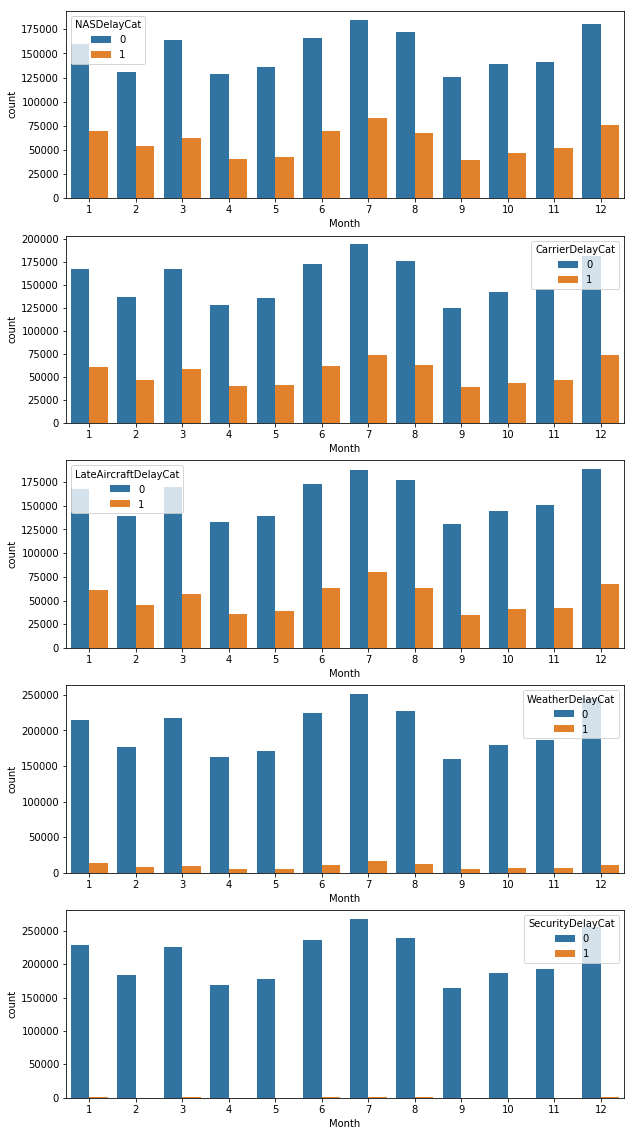

In [19]:
# Investigating the specific reasons for departure delay
plt.figure(figsize = [10,20])

plt.subplot(5, 1, 1)
df_depdelay = df_2005_c.query('DepDelay > 0')
sb.countplot(data=df_depdelay, x='Month', hue='NASDelayCat')

plt.subplot(5, 1, 2)
df_depdelay = df_2005_c.query('DepDelay > 0')
sb.countplot(data=df_depdelay, x='Month', hue='CarrierDelayCat')

plt.subplot(5, 1, 3)
df_depdelay = df_2005_c.query('DepDelay > 0')
sb.countplot(data=df_depdelay, x='Month', hue='LateAircraftDelayCat')

plt.subplot(5, 1, 4)
df_depdelay = df_2005_c.query('DepDelay > 0')
sb.countplot(data=df_depdelay, x='Month', hue='WeatherDelayCat')

plt.subplot(5, 1, 5)
df_depdelay = df_2005_c.query('DepDelay > 0')
sb.countplot(data=df_depdelay, x='Month', hue='SecurityDelayCat');

Weather and Security delays are quite small compared to the other three reasons for departure delays. The other three delay reasons follow a multi modal curve that peaks in July and another one in December/January. Let's see if arrivals follow this pattern.

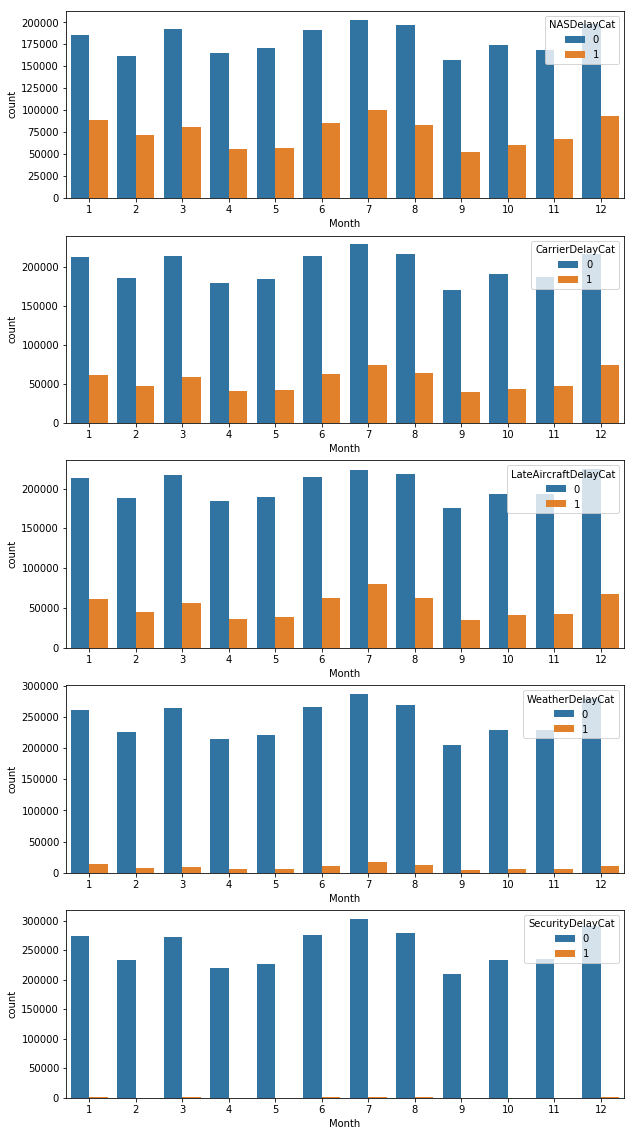

In [20]:
# Investigating the specific reasons for delay
plt.figure(figsize = [10,20])

plt.subplot(5, 1, 1)
df_depdelay = df_2005_c.query('ArrDelay > 0')
sb.countplot(data=df_depdelay, x='Month', hue='NASDelayCat')

plt.subplot(5, 1, 2)
df_depdelay = df_2005_c.query('ArrDelay > 0')
sb.countplot(data=df_depdelay, x='Month', hue='CarrierDelayCat')

plt.subplot(5, 1, 3)
df_depdelay = df_2005_c.query('ArrDelay > 0')
sb.countplot(data=df_depdelay, x='Month', hue='LateAircraftDelayCat')

plt.subplot(5, 1, 4)
df_depdelay = df_2005_c.query('ArrDelay > 0')
sb.countplot(data=df_depdelay, x='Month', hue='WeatherDelayCat')

plt.subplot(5, 1, 5)
df_depdelay = df_2005_c.query('ArrDelay > 0')
sb.countplot(data=df_depdelay, x='Month', hue='SecurityDelayCat');

Arrivals follows the similar patterns found in departures.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

It was really interesting to see the patterns that showed up when comparing the months to the day of the week for the flights. There are peak travel days within a given month throughout the year. There is also relationship between delays and the number of flights. This shows up when we looked at the delays for arrival and departures. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Weather and holidays did not have as big of an impact as I was expecting. Carrier and non-weather related reasons cause way more delays. Looking at the top causes of delay we were able to see a multi modal curve across all three delays.

## Multivariate Exploration

I am going to explore how the many delays are recorded for the year. 

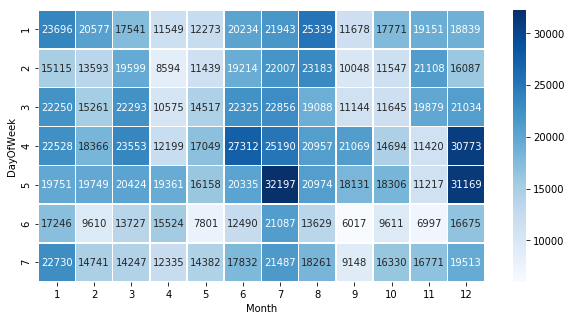

In [21]:
# overall count of delays for the year
plt.figure(figsize = [10,5])
sumcounts = df_2005_c.groupby(['Month', 'DayOfWeek']).sum()['OverallDelayCat']
sumcounts = sumcounts.reset_index(name = 'count')
sumcounts = sumcounts.pivot(index = 'DayOfWeek', columns = 'Month', values = 'count')
sb.heatmap(sumcounts, linewidths=.5, cmap='Blues', annot=True, fmt='.0f');

Here we can see that there are sigificant delays on Friday's in July and Thursday/Friday in December. July continues to be show heavy delays on every day of the week including Saturday which is typically has lower delays out of the week. Saturday's in September have the lowest count of delays.

Just showing the number of delays does not help understand the impact. Let's look at arrival and departure average delays in minutes.

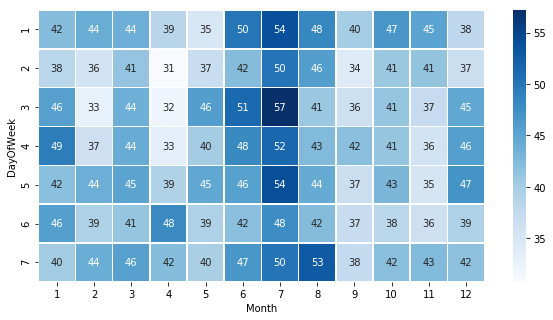

In [22]:
# dive into the mean departure delay in minutes
plt.figure(figsize = [10,5])
sumcounts = df_2005_c.query('OverallDelayCat == 1').groupby(['Month', 'DayOfWeek']).mean()['DepDelay']
sumcounts = sumcounts.reset_index(name = 'count')
sumcounts = sumcounts.pivot(index = 'DayOfWeek', columns = 'Month', values = 'count')
sb.heatmap(sumcounts, linewidths=.5, cmap='Blues', annot=True, fmt='.0f');

In [23]:
# overall average for departure delay
df_2005_c.query('DepDelay > 0')['DepDelay'].mean()

29.649188223812367

Here we can see the average departure delay in minutes. Delays still generally follow the overall delay count pattern. We have a peak average of 57 minutes on the high end to 31 minutes on the low end while the overall average is 30 minutes.

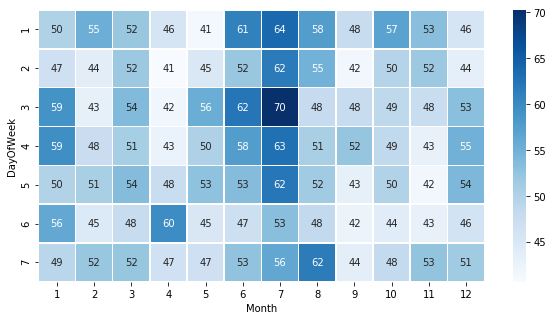

In [24]:
# dive into the mean arrival delay in minutes
plt.figure(figsize = [10,5])
sumcounts = df_2005_c.query('OverallDelayCat == 1').groupby(['Month', 'DayOfWeek']).mean()['ArrDelay']
sumcounts = sumcounts.reset_index(name = 'count')
sumcounts = sumcounts.pivot(index = 'DayOfWeek', columns = 'Month', values = 'count')
sb.heatmap(sumcounts, linewidths=.5, cmap='Blues', annot=True, fmt='.0f');

In [25]:
# overall average for arrival delay
df_2005_c.query('ArrDelay > 0')['ArrDelay'].mean()

28.321059655486934

Here we can see the average arrival delay in minutes. Delays still follow the pattern. We have a peak average of 70 minutes on the high end to 41 minutes on the low end while the overall average is 28 minutes. Overall delay minutes increased from departures. Let's see what the average delays are for the specific categories.

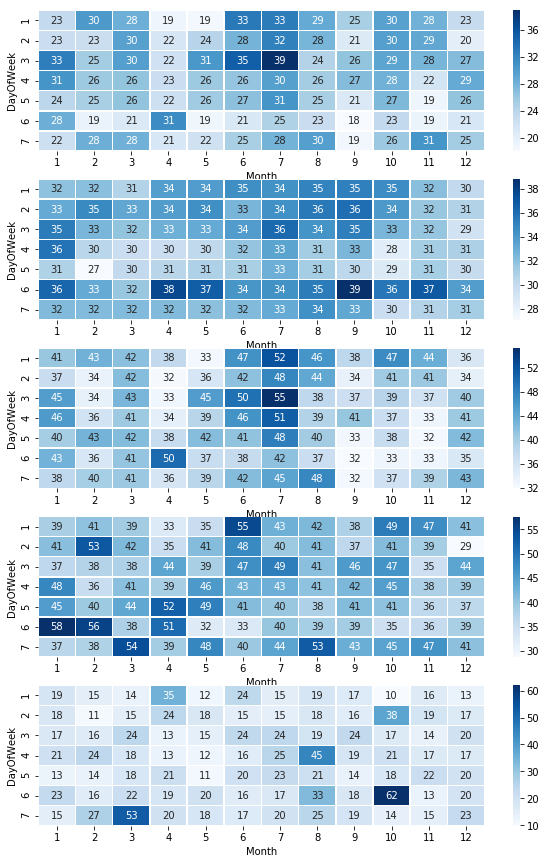

In [26]:
plt.figure(figsize = [10,15])

plt.subplot(5, 1, 1)
counts = df_2005_c.query('NASDelayCat == 1').groupby(['Month', 'DayOfWeek']).mean()['NASDelay']
counts = counts.reset_index(name = 'count')
counts = counts.pivot(index = 'DayOfWeek', columns = 'Month', values = 'count')
sb.heatmap(counts, linewidths=.5, cmap='Blues', annot=True, fmt='.0f');

plt.subplot(5, 1, 2)
counts = df_2005_c.query('CarrierDelayCat == 1').groupby(['Month', 'DayOfWeek']).mean()['CarrierDelay']
counts = counts.reset_index(name = 'count')
counts = counts.pivot(index = 'DayOfWeek', columns = 'Month', values = 'count')
sb.heatmap(counts, linewidths=.5, cmap='Blues', annot=True, fmt='.0f');

plt.subplot(5, 1, 3)
counts = df_2005_c.query('LateAircraftDelayCat == 1').groupby(['Month', 'DayOfWeek']).mean()['LateAircraftDelay']
counts = counts.reset_index(name = 'count')
counts = counts.pivot(index = 'DayOfWeek', columns = 'Month', values = 'count')
sb.heatmap(counts, linewidths=.5, cmap='Blues', annot=True, fmt='.0f');

plt.subplot(5, 1, 4)
counts = df_2005_c.query('WeatherDelayCat == 1').groupby(['Month', 'DayOfWeek']).mean()['WeatherDelay']
counts = counts.reset_index(name = 'count')
counts = counts.pivot(index = 'DayOfWeek', columns = 'Month', values = 'count')
sb.heatmap(counts, linewidths=.5, cmap='Blues', annot=True, fmt='.0f');

plt.subplot(5, 1, 5)
counts = df_2005_c.query('SecurityDelayCat == 1').groupby(['Month', 'DayOfWeek']).mean()['SecurityDelay']
counts = counts.reset_index(name = 'count')
counts = counts.pivot(index = 'DayOfWeek', columns = 'Month', values = 'count')
sb.heatmap(counts, linewidths=.5, cmap='Blues', annot=True, fmt='.0f');

Here we can see that the different types of delays have a much different impact in the amount of delay in minutes. Carrier delay is consistently around 32 minutes throught the year. Where the security delay is around 21 minutes with some high outliers. We also see the impact of Weather when looking at minutes as it had an average of 42 even though it was only the 4th highest in delay count.

In [27]:
# mean delays for the specifc delay type
print('NASDelay  ' + str(df_2005_c.query('NASDelayCat == 1')['NASDelay'].mean()))
print('CarrierDelay  ' + str(df_2005_c.query('CarrierDelayCat == 1')['CarrierDelay'].mean()))
print('LateAircraftDelay  ' + str(df_2005_c.query('LateAircraftDelayCat == 1')['LateAircraftDelay'].mean()))
print('WeatherDelay  ' + str(df_2005_c.query('WeatherDelayCat == 1')['WeatherDelay'].mean()))
print('SecurityDelay  ' + str(df_2005_c.query('SecurityDelayCat == 1')['SecurityDelay'].mean()))

NASDelay  26.80078130224471
CarrierDelay  32.55502668397519
LateAircraftDelay  41.4578900821626
WeatherDelay  42.318651919416816
SecurityDelay  21.28338614757809


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

In this section we applied the average delay in minutes to the overall year. By breaking out the delays into their specific categories we were able to see how small or large of an impact they can have. We also observed some specific categories breaking from the overall delay pattern we have observed such as carrier delay.

### Were there any interesting or surprising interactions between features?

Weather came back big with the largest delay in minutes even though they had the 4th lowest total count. Carrier delay was consistent across the board, however late aircraft followed the overall pattern.

### Resources
* https://www.transtats.bts.gov/Fields.asp?Table_ID=236
* https://docs.python.org/3/library/bz2.html
* https://stackoverflow.com/questions/27333671/how-to-solve-the-10054-error
* https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.append.html
* https://scentellegher.github.io/programming/2017/07/15/pandas-groupby-multiple-columns-plot.html
* https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
* https://www.weather.gov/mob/events
* https://pandas.pydata.org/pandas-docs/stable/categorical.html
* https://stackoverflow.com/questions/35414431/how-to-define-user-defined-function-in-pandas
* https://aspmhelp.faa.gov/index.php/Types_of_Delay
* https://seaborn.pydata.org/generated/seaborn.countplot.html
* https://seaborn.pydata.org/generated/seaborn.heatmap.html
* https://seaborn.pydata.org/tutorial/color_palettes.html
* https://stackoverflow.com/questions/32542957/control-tick-labels-in-python-seaborn-package
* https://stackoverflow.com/questions/26540035/rotate-label-text-in-seaborn-factorplot
* https://en.wikipedia.org/wiki/North_American_blizzard_of_2005